# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Write your code here to read the data
# IMP NOTE foodhub_order.csv path must be set correctly in order to run this assignment
# My foodhub order csv file is in my '/MyDrive/PGP-AIML/python/FoodHub/' folder
workdir = '/content/drive/MyDrive/PGP-AIML/python/FoodHub/'
df = pd.read_csv(workdir+"foodhub_order.csv")

In [4]:
# Write your code here to view the first 5 rows
# head function provides 5 rows by default. head() or head(5) provides first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Write your code here
# DataFrame shape attribute provides number of rows and columns
df.shape

(1898, 9)


#### Observations:
* There are `1898` rows and `9` columns in the Foodhub dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
# info function on the dataframe provides column names, how many non-null data rows, and data type for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are `5` numerical data type columns in the data and `4` object type columns.
* `rating` is read as object type column but it should be a numerical column.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
# Get column names that have null data and sum of each column
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:
* There are `NO` missing values in any of the columns.
* Seems to have clean data for analysis.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
# describe function provides statistical summary for all the columns. For food_preparation_time column use folowing command
df.describe()['food_preparation_time']

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations:
* Minimum time taken to prepare food once order placed is `20` minutes
* Average time taken to prepare food once order placed is about `27.37` minutes
* Maximum time taken to prepare food once order placed is `35` minutes

### **Question 5:** How many orders are not rated? [1 mark]

In [5]:
# Write the code here
# Get unrated order count with a rating filter to match not given value and take sum of each of rating.
unrated_order_count = df[df['rating'] == 'Not given'].value_counts().sum()
print('Total number of orders not rated ', unrated_order_count)
# print the rating counts table
df['rating'].value_counts()

Total number of orders not rated  736


,count
rating,
Not given,736
5,588
4,386
3,188


#### Observations:

* There are `736` orders (about `39%` of total orders) that not not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [9]:
# Write the code here
# nunique function on dataframe provides count of unique values of a column
print('Total Number of orders ', df['order_id'].nunique())
print('Total Number of customers ordered ', df['customer_id'].nunique())
print('Total Number of restaurants customer ordered ', df['restaurant_name'].nunique())
print('Total Number of cuisine types customer ordered ', df['cuisine_type'].nunique())

Total Number of orders  1898
Total Number of customers ordered  1200
Total Number of restaurants customer ordered  178
Total Number of cuisine types customer ordered  14


# Observations:
* Total Number of orders  `1898`
* Total Number of customers ordered  `1200`
* Total Number of restaurants customer ordered  `178`
* Total Number of cuisine types customer ordered  `14`

# restaurant_name

In [ ]:
# print unique number of restaurant_name
restaurant_name_count = df['restaurant_name'].nunique()
print('Unique restaurant name count ', restaurant_name_count)


Unique restaurant name count  178


# Observations:
* Unique restaurant count  `178`

### cuisine_type

Total Number of cuisine types  14 
-------------------------------

cuisine types value counts cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64 
-------------------------------



<Axes: xlabel='cuisine_type', ylabel='count'>

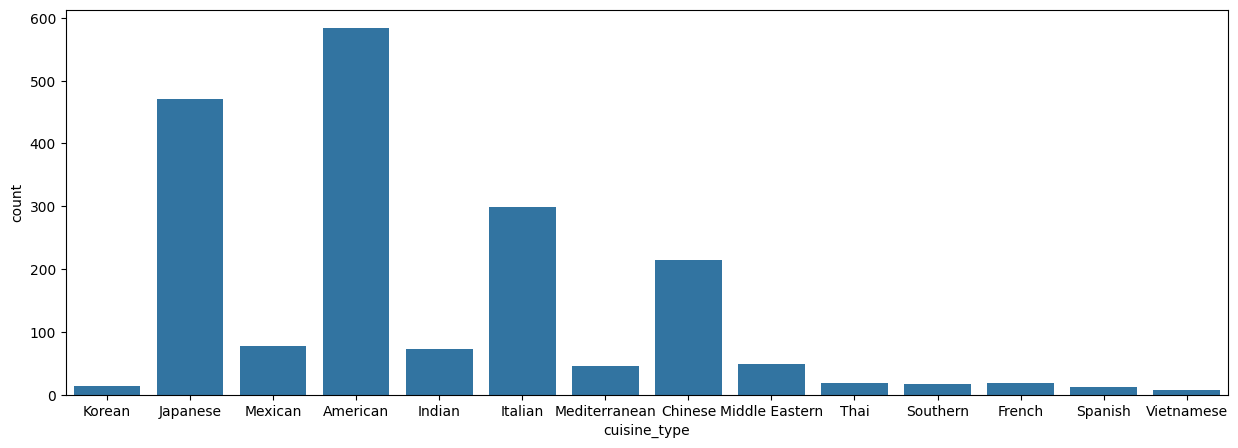

In [6]:
# defing cuisine type count and assign nunique value of cuisine_type
cuisine_type_count = df['cuisine_type'].nunique()
print('Total Number of cuisine types ', cuisine_type_count, "\n-------------------------------\n")
# defing cuisine type value count dataframe with value counts for each.
cuisine_type_value_count = df['cuisine_type'].value_counts()
print('cuisine types value counts', cuisine_type_value_count, "\n-------------------------------\n")
# plot cuisine_type using the datafram
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

# Observations:
* There are `14` unique cuisine types available for customers.
* Of all orders, majority were in American, Japanese, Italian, and Chinese cuisine type in that order.

## cost_of_the_order

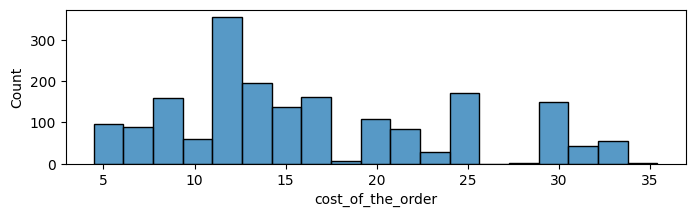


-------------------------------



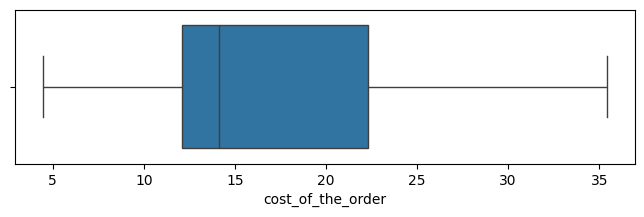

In [ ]:
# Histogram for the cost of order
plt.figure(figsize = (8,2))
sns.histplot(data=df, x='cost_of_the_order')
plt.show()
print("\n-------------------------------\n")
# Boxplot for the cost of order
plt.figure(figsize = (8,2))
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()


# Observations:
* Minimum order cost is `$4.47`
* Maximum order cost is `$35.41`
* Average order cost is `$16.5`
* `50%` of the orders have cost less than `$15`


# day_of_the_week

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64 

-------------------------------



<Axes: xlabel='day_of_the_week', ylabel='count'>

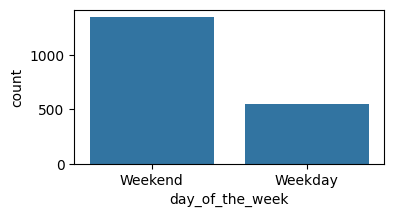

In [12]:
# create a dataframe for day_of_the_week with value counts for each
day_of_the_week = df['day_of_the_week'].value_counts()
print(day_of_the_week, "\n\n-------------------------------\n")
# draw count plot for day_of_the_week
plt.figure(figsize = (4,2))
sns.countplot(data = df, x = 'day_of_the_week')

# Observations
* Weekend order count is `1351`, weekday order count is `547`.
* Weekend orders more than `double` the weekday orders.
* Customers prefer to order during weekends over weekdays.

# rating

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64 
-------------------------------



<Axes: xlabel='rating', ylabel='count'>

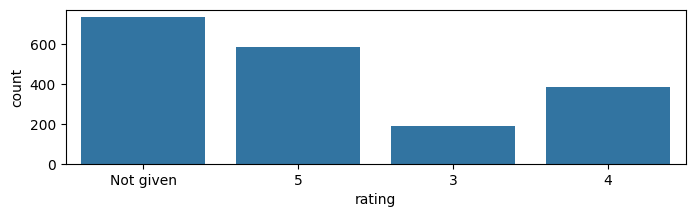

In [ ]:
# create a dataframe for ratings with value counts
ratings = df['rating'].value_counts()
print(ratings, "\n-------------------------------\n")
# count plot for rating
plt.figure(figsize = (8,2))
sns.countplot(data = df, x = 'rating')


# Observations
* Customers left ratings for `1162` orders, about `61%`.
* Customers have not rated `736` orders, about `39%`
* Of all rated, customers gave `5 rating to 588 orders`, about `50% `of the rated orders.

# food_preparation_time

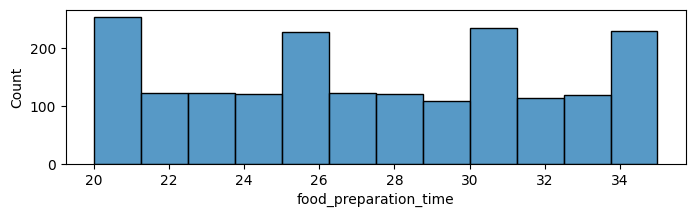


-------------------------------



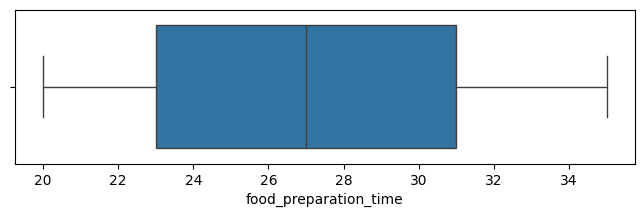

In [ ]:
# histogram for the food_preparation_time
plt.figure(figsize = (8,2))
sns.histplot(data=df,x='food_preparation_time')
plt.show()
print("\n-------------------------------\n")
# boxplot for the food_preparation_time
plt.figure(figsize = (8,2))
sns.boxplot(data=df,x='food_preparation_time')
plt.show()



# Observations:
* Minimum food prep time `20` minutes.
* Maximum food prep time `35` minutes.
* Average food prep time is about `27` minutes.
* `50%` of the orders prepared in `less than or equals to 27 minutes`.

# delivery_time

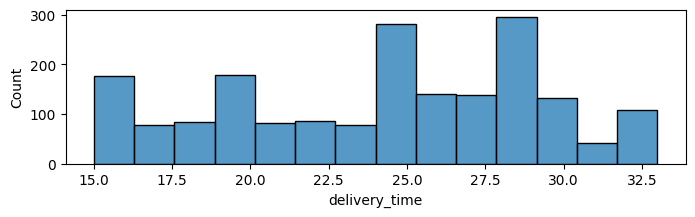


-------------------------------



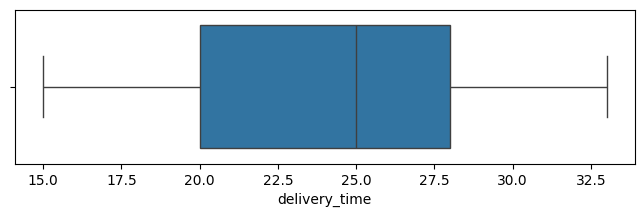

In [ ]:
# histogram for the delivery_time
plt.figure(figsize = (8,2))
sns.histplot(data=df,x='delivery_time')
plt.show()
print("\n-------------------------------\n")
# boxplot for the delivery_time
plt.figure(figsize = (8,2))
sns.boxplot(data=df,x='delivery_time')
plt.show()


# Observations:
* Minimum delivery time `15` minutes.
* Maximum delivery time `33` minutes.
* Average delivery time is about `25` minutes.
* `50%` of the orders delivered in less than or equals to `25` minutes.
* Based on histogram plot, there is high number of orders deliverd around `24 to 25` minute mark, and `28 to 29` minute mark.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
# Get dataframe of value counts by restaurant names and get top 5 of them
df['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
* `Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken 	, and Parm` are the top `5` restaurants in number of orders received.
* Of the `top 5`, t`op 2` restaurants got `55%` of the total orders between the `top 5`.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
# create weekend dataframe where day_of_the_week is Weekend
weekend_df = df[df['day_of_the_week'] == 'Weekend']
# print top 5 cuisine types for the weekend
weekend_df['cuisine_type'].value_counts().head(5)



,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


#### Observations:
* `American` is the most popular cuisine on the weekends based on the customers orders.
* `Japanese, Italian, Chinese, and Mexicun` are the next in higher order count after American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
# create dataframe for the cost of the order greater than $20
cost_df = df[df['cost_of_the_order']>20]
print(cost_df.shape)
print(df.shape)
# calculate percentage of the order greater than $20 compared to total orders
more_than_20_orders_percentage = (cost_df.shape[0] / df.shape[0]) * 100
print(round(more_than_20_orders_percentage, 2))

(555, 9)
(1898, 9)
29.24


#### Observations:
* Total customer orders `1898`, of which `555` orders cost more than `20` dollars.
* Percentage of the orders cost more than `20` compared to total orders is `$29.24`

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
# create dataframe with mean delivery time
delivery_time_df = df['delivery_time'].mean()
# print mean delivery time rounded to 2 decimals
print('Mean delivery time ', round(delivery_time_df, 2), 'minutes')

Mean delivery time  24.16 minutes


#### Observations:
* Mean delivery time is `24.16` minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
# create a dataframe with top 3 customer id value counts
customer_df = df['customer_id'].value_counts().head(3)
#print the customer id and number of orders
print(customer_df)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:
* Customer with ID `52832` ordered most, with `13` orders.
* Customer IDs `52832, 47440, and 83287` are eligible for the `20%` discount based on the order count.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


# cuisine_type vs cost_of_the_order

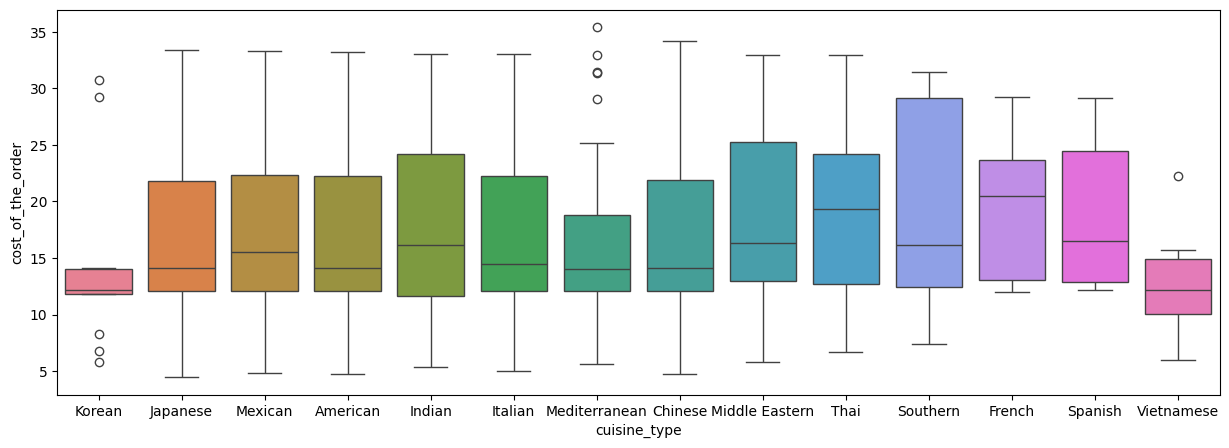

In [ ]:
# Write the code here
# create boxplot for all cuisine types with cost of the order, with cuisine type as hue
plt.figure(figsize=(15,5))
sns.boxplot(x="cuisine_type", y="cost_of_the_order", data=df, hue="cuisine_type")
plt.show()

# Observations:
* `Korean, Mediterranean, and Vietnamese` have few outliers.
* Cost of the order is lower in `Korean and Vietnamese `cuisines compared to other cuisines.
* Cost of the order is higher in `Thai and French cuisines` compared to other cuisines.

# cuisine_type vs food_preparation_time

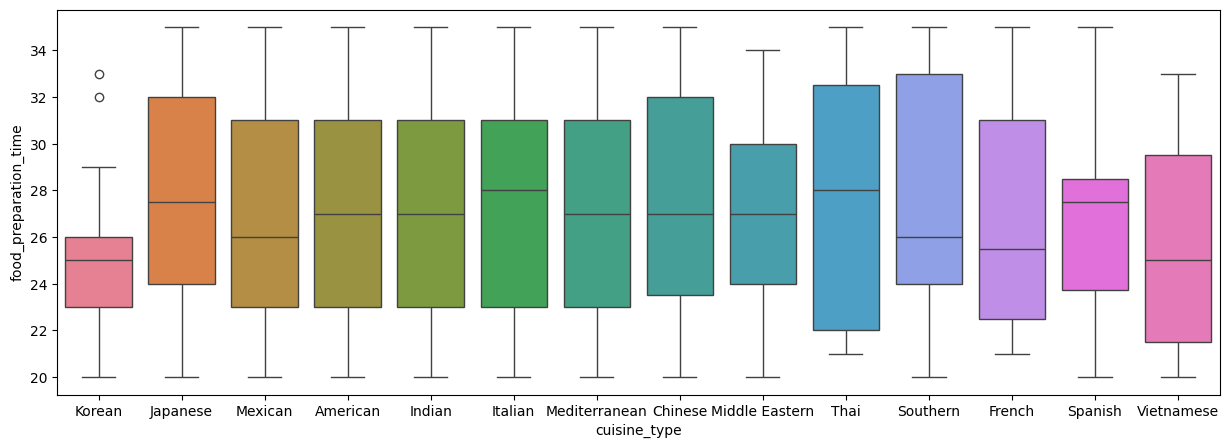

In [ ]:
# create boxplot for cuisine type with food preparation time, with hue cuisine type.
plt.figure(figsize=(15,5))
sns.boxplot(x="cuisine_type", y="food_preparation_time", data=df, hue="cuisine_type")
plt.show()

# Observations:
* `Korean` cuisine type has few outliers.
* Food preparation time is `lower` in `Korean and Vietnamese cuisines` compared to other cuisines.
* Food preparation time is `higher` in Thai and Italian cuisines compared to other cuisines.

# day_of_the_week vs delivery_time

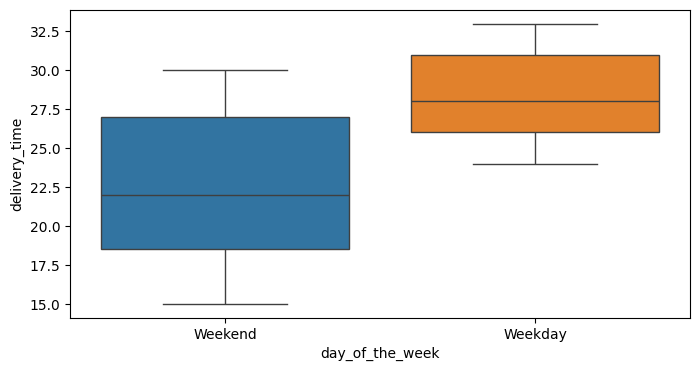

In [ ]:
#create boxplot for delivery time based on day_of_the_week, with hue day_of_the_week
plt.figure(figsize=(8,4))
sns.boxplot(x="day_of_the_week", y="delivery_time", data=df, hue="day_of_the_week")
plt.show()

# Observations:
* `Delivery time` is `lower` in the `weekend` compared to weekday.
* `Delivery time` on `weekday` is about `5 minutes higher` than `weekend`.

# rating vs delivery_time

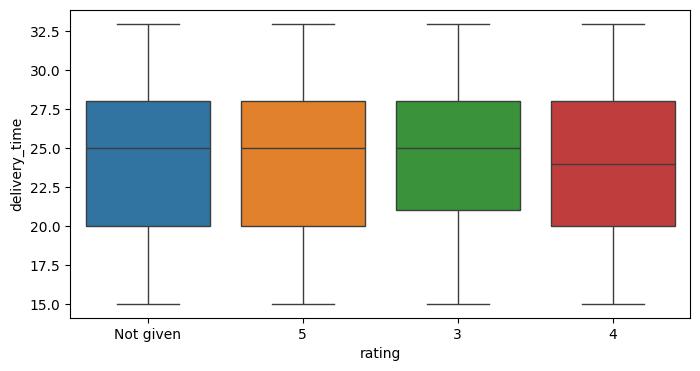

In [ ]:
# create boxplot for rating vs delivery time, with hue rating
plt.figure(figsize=(8,4))
sns.boxplot(x="rating", y="delivery_time", data=df, hue="rating")
plt.show()

# Observations:
* No outliers found for all ratings.
* Delivery time does not seem to affect ratings given. Though, customers given a rating of 4 for lower delivery times.
* Customers have not given rating for delivery time similar to that of rating 3 and 5. There is not much of a correlation here.


# rating vs food_preparation_time

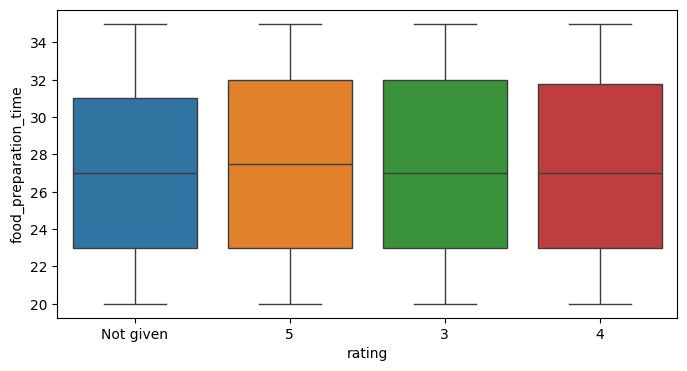

In [ ]:
# create boxplot between rating vs food processing time, with as rating.
plt.figure(figsize=(8,4))
sns.boxplot(x="rating", y="food_preparation_time", data=df, hue="rating")
plt.show()

# Observations:
* No outliers found for food prep time.
* Food prep time does not seem to affect much in the ratings given.
* Customers gave rating 3 and 4 for the similar prep time. Not much correlation there.
* Customers have given rating 5 even though food prep time is little high. Probably due to satisfaction with quality and/ or type of restaurant.
* Customers also not given rating even when prep time is less than that of rated ones.
* 50% of the rated and non-rated orders have food prep time under 28 minutes.


# rating vs cost_of_the_order

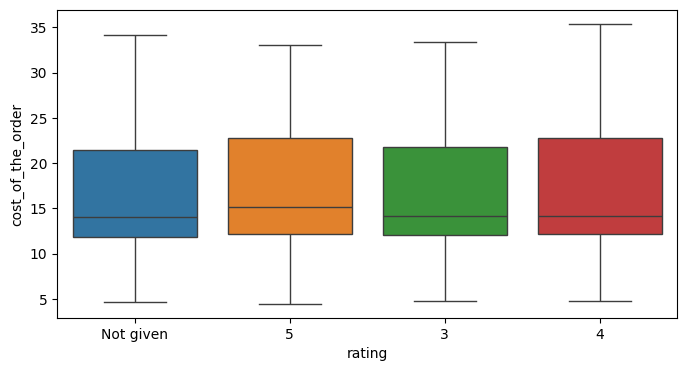

In [ ]:
# create boxplot for rating vs cost_of_the_order, with hue rating.
plt.figure(figsize=(8,4))
sns.boxplot(x="rating", y="cost_of_the_order", data=df, hue="rating")
plt.show()

# Observations:
* No outliers found for the cost of the orders with rating.
* 50% of the rated and non-rated orders have cost under or equal to 15 dollars.
* Despite higher cost, customers have rated 5 for some of the orders.
* Rating does not seem to highly co-relate with the cost of the order.


# heatmap correlation cost_of_the_order, food_preparation_time, and delivery_time

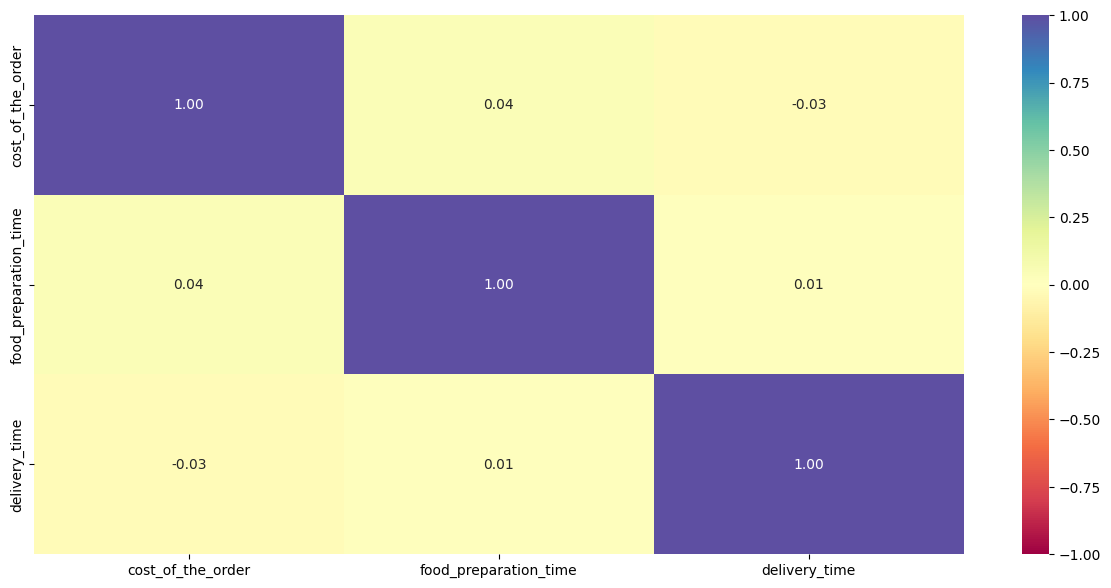

In [ ]:
# create a column list for 'cost_of_the_order', 'food_preparation_time', 'delivery_time' for correlation matrix.
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
# plot the correlation
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# Observations:
* There is a `very small positive correlation` between food preparation time and cost of the order but it is not significant.
* There is a `not much correlation` between delivery time and food prep time.
* There is a `very small negative correlation` between delivery time and cost of the order but is not significant.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
# create a dataframe numerica rated orders only.
ratings_only_df = df[df['rating'] != 'Not given'].copy()

# rating is defined as object type, change it to int to perform actions on it
ratings_only_df['rating'] = ratings_only_df['rating'].astype('int')
# create dataframe with group by restaurant name with rating count for each restaurant, order the data by rating count descending values
ratings_only_count_df = ratings_only_df.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False)
# create a new dataframe with ratings count > 50
ratings_only_count_df = ratings_only_count_df[ratings_only_count_df > 50]
print(ratings_only_count_df, "\n")

res_df = ratings_only_df[ratings_only_df['restaurant_name'].isin(ratings_only_count_df.index.tolist())].copy()
# create dataframe with mean values for data grouped by restaurant name and rating, order by descending count, drop NaN values, and rest index
mean_df = res_df.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()
print(mean_df, "\n")
# create a new dataframe with mean greater than 4
mean_greater_than_4_df = round(mean_df[mean_df['rating'] > 4].sort_values(by='restaurant_name', ascending=False).reset_index(drop=True), 2)
print(mean_greater_than_4_df)


restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
Name: rating, dtype: int64 

             restaurant_name  rating
0          The Meatball Shop    4.51
1                Shake Shack    4.28
2          Blue Ribbon Sushi    4.22
3  Blue Ribbon Fried Chicken    4.33


#### Observations:
* There are `1162` orders rated by customers
* There are `4` restaurants that have more than `50` ratings. `Shake Shack` leading with `133` ratings count.
* `The Meatball Shop` restaurant has the highest mean rating of `4.51` where as `Blue Ribbon Sushi` restaurant has the lowest among the four with mean value `4.22`

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [5]:
# Write the code here

# Define three variables to track counts of orders with cost 20 above, between 5 to 20, and below 5
orderCountFor20Plus = 0
orderCountFor5Plus = 0
orderCountFor5Below = 0

# Define a function to increment counts
def calculate_revenue(cost):
    # define the variables as global
    global orderCountFor20Plus
    global orderCountFor5Plus
    global orderCountFor5Below
    if cost > 20:
        orderCountFor20Plus += 1
        return 0.25 * cost
    elif cost > 5:
        orderCountFor5Plus += 1
        return 0.15 * cost
    else:
        orderCountFor5Below += 1
        return 0


# create a revenue column on the dataframe, apply the function to each cost of the order
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)
print('orderCountFor20Plus', orderCountFor20Plus)
print('orderCountFor5Plus', orderCountFor5Plus)
print('orderCountFor5Below', orderCountFor5Below)
# Find the sum of all revenue
net_revenue = df['revenue'].sum()
print('The net revenue is ', round(net_revenue, 2), 'dollars')


orderCountFor20Plus 555
orderCountFor5Plus 1334
orderCountFor5Below 9
The net revenue is  6166.3 dollars


#### Observations:
* There are 555 orders with cost over `$20`
* There are 1334 orders with cost between `$5` and `$20`
* There are 9 orders with cost less than `$5`
* Net revenue from the orders is `$6166.30`

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
# define a new column for food order to delivery time
df['food_order_to_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
food_order_to_delivery_time_df = df['food_order_to_delivery_time']
# create dataframe to with food order delivery time greater than 60 minutes
food_order_to_delivery_time_more_than_60_df = food_order_to_delivery_time_df[food_order_to_delivery_time_df > 60]
food_order_to_delivery_time_more_than_60_df

# determine percentage of order count where order to delivery time  > 60 minutes to the total number of orders
percentage = (food_order_to_delivery_time_more_than_60_df.shape[0] / df.shape[0]) * 100

print("Percentage of orders took more than 60 minutes from order to delivery", round(percentage, 2), '%')


(1898,)
(200,)
Percentage of orders took more than 60 minutes from order to delivery 10.54 %


#### Observations:
* There are `200` orders out of `1898` have order to delivery time more than `60 minutes.`
* Percentage of the orders took more than `60` minutes from order to delivery `10.54 %`

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [6]:
# Write the code here
# define weekday dataframe from original dataset
weekday_df = df[df['day_of_the_week'] == 'Weekday']
print('Mean delivery time on weekdays is', round(weekday_df['delivery_time'].mean()), 'minutes')
# define weekend dataframe from original dataset
weekend_df = df[df['day_of_the_week'] == 'Weekend']
print('Mean delivery time on weekends is', round(weekend_df['delivery_time'].mean()), 'minutes')
# print value counts of the top 5 restaurants
weekend_df['restaurant_name'].value_counts().head()

Mean delivery time on weekdays is 28 minutes
Mean delivery time on weekends is 22 minutes


,count
restaurant_name,
Shake Shack,145
The Meatball Shop,95
Blue Ribbon Sushi,85
Blue Ribbon Fried Chicken,74
RedFarm Broadway,44


#### Observations:
* Mean delivery time on weekdays is `28` minutes
* Mean delivery time on weekends is `22` minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
* The FoodHub data provided did not have any missing columns data.
* There are `1200` unique customers placed `1898` orders in total from `178` restaurants.
* Restaurants categorized into `14` cuisine types.
* Majority of the orders were made in `American`, `Japanese`, `Italian`, and `Chinese` restaurants.
* Food preparation time ranges between `20` minute to `35` minutes. `50%` of the orders prepared in about `27` minutes or less.
* Food delivery time ranges between `15` minutes to `33` minutes. `50%` of the orders delivered in about `25` minutes or less.
* Weekday delivery times are few minutes higher than weekend. It is expected that weekday traffic usually higher during weekdays.
* About `10% `of the orders took more than 60 minutes from `order to delivery.` This may be due to popular restaurants usually are very busy and some delays can be expected.
* Customers left ratings for `1162` orders (`61% `of the total orders). There are `736` orders (about `39%` of total orders) that not not rated.
* Of the rated orders, customers left minimum rating of 3 for all of them indicating they feel good about the food.
* Of the rated orders, customers left minimum rating of `5` for `50%` of them indicating they really loved the food and the restaurant.
* Food cost ranges from `$4.47` to `$35.41`. Customers paid less than `$15` for `50%` of the total orders.
* Order count on `weekdays is 1351` and on `weekends is 547`. Customers orders are higher in weekends compared to weekdays. This is expected as customers find time to relax and order during weekends.
* Customers mostly ordered from restaurants `Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken , and Parm` indicating they are the most popular among all the restaurants.
* Based on the customer orders, irrespective of a weekend or a weekday, `American` is the most popular cuisine followed by `Japanese, Italian, Chinese, and Mexican`.
* Customers paid less than `$20` for about `70%` of the total orders placed.
* `Thai` and `French` cuisines scored as high cost restaurants and `Korean` and `Vietnamese` cuisines scored as low cost restaurants. Most popular restaurants cost in between.
* Customers did not seem to rate based on food preparation time or delivery times but the food quality, restaurant.
* Customers rated `1162` orders out of `1898` orders. Shake Shack restaurant leading with 133 ratings count.
* There is not much postive or negative correlation between cost of the orders in comparison to food preparation time or food delivery time


### Recommendations:
*  Restaurants other than `American, Japanese, Italian, Chinese, and Mexican` should run `promotions` to attract customers.
* Customer `rewards` implementation could help restaurants get more customers. * Restaurants with `non-rated` orders should encourage customers leave a review with email or phone remainders or with incentives (rewards, points, redemption ..etc)
* Customers prefer to pay around `$20 `on average per order. Restaurants can `promote combo or addon offers` to `increase customer spending` hence `benefit` from `customer satisfaction and extra revenue`.
* Restaurants must `continue to maintain or improve on quality of food` to i`ncrease customer satisfaction`. A simple `feedback system` like '`like or dislike`' apart from 5 star rating would allow a quick turn around for restaurants to take actions.

---